In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


!pip install pystan==2.19.1.1
!pip install prophet


!pip install pystan~=2.14
!pip install fbprophet

In [11]:
from prophet import Prophet

In [24]:
#import dataframe
df=pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [26]:
#convert column to datetime
df['FullDate']= pd.to_datetime(df['FullDate'])

# Set 'FullDate to index
df.set_index("FullDate", inplace=True)
df.head()


,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [40]:
# Resample the dataset
df_daily = df.resample("D").sum()

#split train and test data
Train_df = df_daily[:2757]
Test_df = df_daily[2757:]




2757
1077


In [72]:
print(len(Train_df))
len_test_df = len(Test_df)
print(len_test_df)

2757
1077


In [108]:
# Reset index
Train_df_r = Train_df.reset_index()
Train_df_r.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


**Question 11- The plot of ElecPrice over time?**|


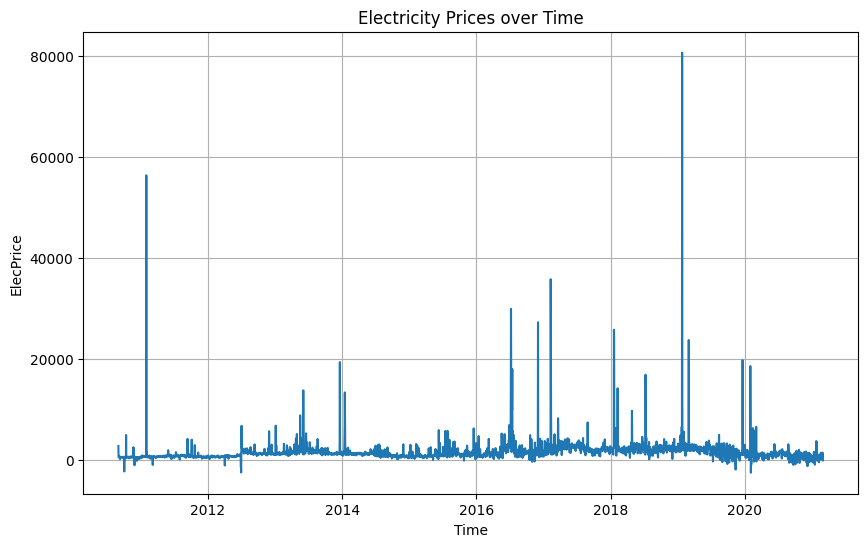

In [48]:
# Plot ElecPrice over time
plt.figure(figsize=(10, 6))
plt.plot(df_daily.index, df_daily['ElecPrice'])
plt.xlabel('Time')
plt.ylabel('ElecPrice')
plt.title('Electricity Prices over Time')
plt.grid(True)
plt.show()


In [109]:
#rename columns to "ds" and "y" respectively
Train_df_ru = Train_df_r.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
Train_df_ru.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [110]:
Train_df_univariant = Train_df_ru[['ds', 'y']]
Train_df_univariant.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [111]:
#training an univariate time series model using Facebook Prophet
model = Prophet()
model.fit(Train_df_univariant)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuuziux8/0sy1r1ci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuuziux8/vti58jiq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3411', 'data', 'file=/tmp/tmpsuuziux8/0sy1r1ci.json', 'init=/tmp/tmpsuuziux8/vti58jiq.json', 'output', 'file=/tmp/tmpsuuziux8/prophet_modeljz07h8qe/prophet_model-20230801221427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:14:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:14:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Question 12**

**The P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places.**

In [51]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {round(adf_result[1], 6)}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f' {k}: {v}')

ADF Statistic: -3.6901589888366493
p-value: 0.004254
No. of lags used: 30
No. of observations used : 3803
Critical Values:
 1%: -3.432070672988693
 5%: -2.8623002987378547
 10%: -2.567174716967499


In [52]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {round(adf_result[1], 6)}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f' {k}: {v}')

ADF Statistic: -2.902766697165179
p-value: 0.045027
No. of lags used: 27
No. of observations used : 3806
Critical Values:
 1%: -3.4320693157877544
 5%: -2.8622996992165364
 10%: -2.5671743978048323


**Question 13**

**The 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places.**

In [54]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {round(adf_result[1], 6)}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f' {k}: {round(v, 4)}')

ADF Statistic: -2.902766697165179
p-value: 0.045027
No. of lags used: 27
No. of observations used : 3806
Critical Values:
 1%: -3.4321
 5%: -2.8623
 10%: -2.5672


In [55]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {round(adf_result[1], 6)}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print(f' {k}: {round(v, 4)}')

ADF Statistic: -8.269053866873799
p-value: 0.0
No. of lags used: 20
No. of observations used : 3813
Critical Values:
 1%: -3.4321
 5%: -2.8623
 10%: -2.5672


***The MAPE (in %) in 2 decimal places after evaluating the results of time series model on the test set. ***

In [56]:
def MAPE(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) between the true values and the predicted values.

    Parameters:
        y_true (array-like): Array of true values.
        y_pred (array-like): Array of predicted values.

    Returns:
        float: The calculated MAPE.
    """
    n = len(y_true)
    mape = (1 / n) * sum(abs((y_true[i] - y_pred[i]) / y_true[i]) for i in range(n)) * 100
    return mape


Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [112]:
future = model.make_future_dataframe(periods=len_test_df, freq='D')
forecast = model.predict(future)
forecast.head(2)



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,863.835947,-1396.584521,3266.147585,863.835947,863.835947,146.477283,146.477283,146.477283,159.421504,159.421504,159.421504,-12.944221,-12.944221,-12.944221,0.0,0.0,0.0,1010.313230
1,2010-09-02,863.700334,-1413.775610,3504.622836,863.700334,863.700334,226.679689,226.679689,226.679689,257.239178,257.239178,257.239178,-30.559489,-30.559489,-30.559489,0.0,0.0,0.0,1090.380022


In [113]:
predictions = forecast[:len(Test_df)]

**Question 14**

In [114]:
mape_value = MAPE(Test_df['ElecPrice'], predictions['yhat'])
print(f"MAPE: {mape_value:.2f}%")

MAPE: 295.65%


In [80]:
print(len(Test_df['ElecPrice']))
print(len(forecast['yhat']))

1077
3834


**Question 15**

**The RMSE in 2 decimal places.**

In [88]:
from sklearn.metrics import mean_squared_error
import numpy as np


mse = mean_squared_error(Test_df['ElecPrice'], predictions['yhat'])

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 3054.07


**Question 16: The month of the yearly seasonality with the highest value**

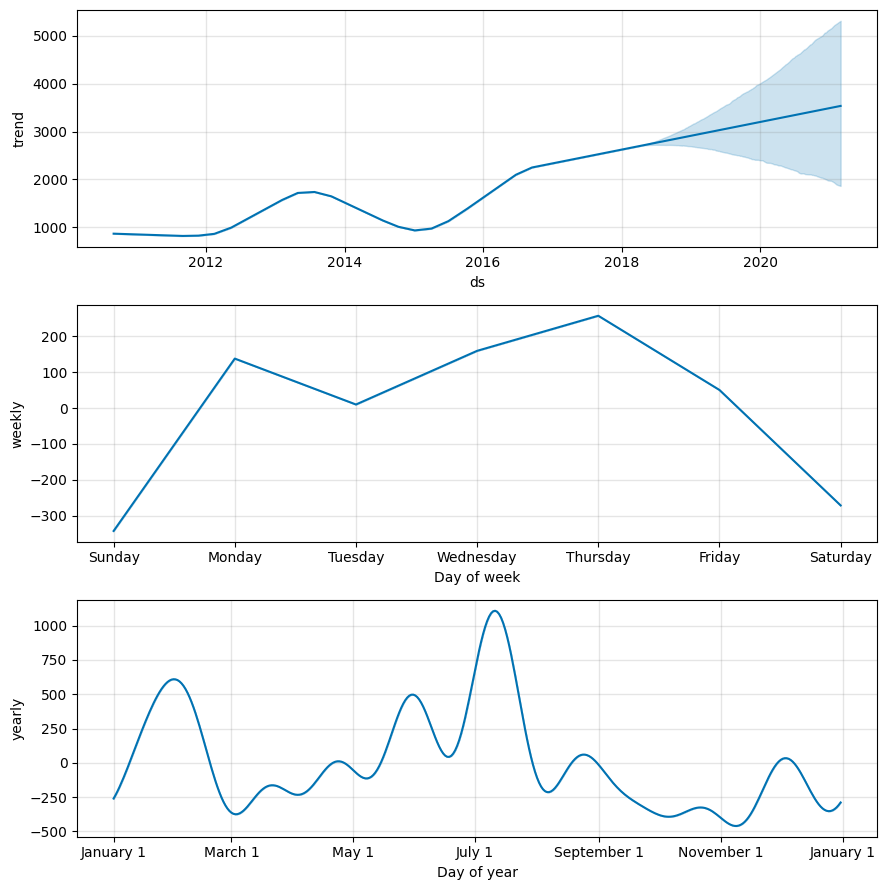

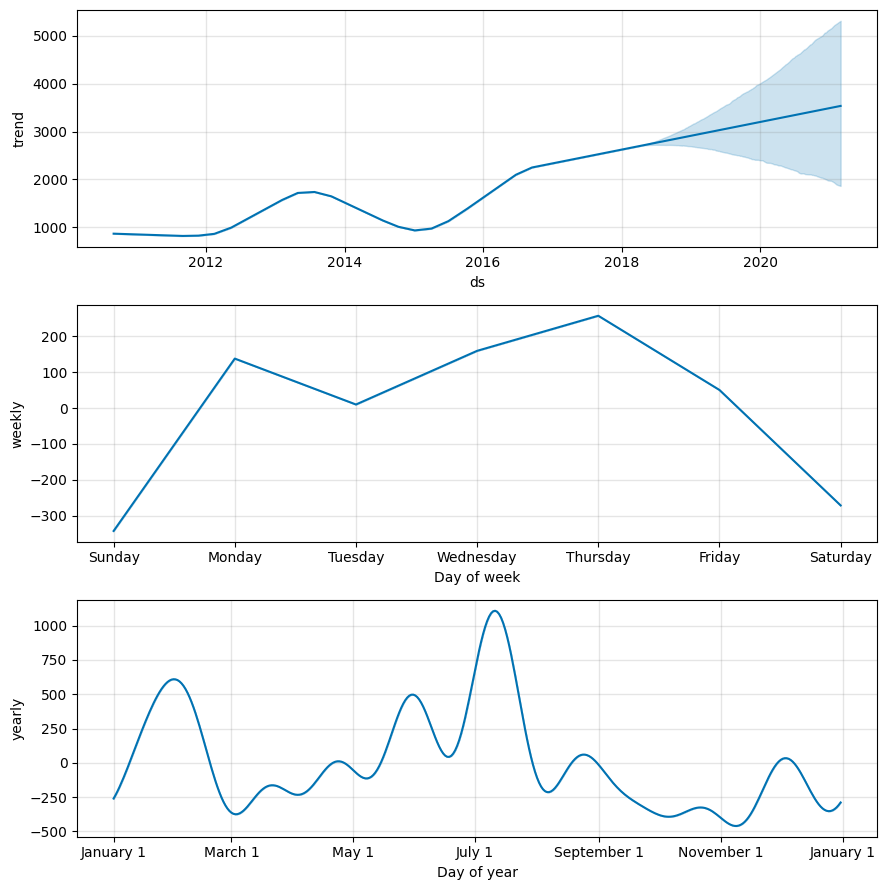

In [90]:
model.plot_components(forecast)

**Further Instructions (17-19)**
Multivariate Time Series Forecasting with Facebook Prophet

In [106]:
#rename columns to "ds" and "y" respectively
Train_dfm1 = Train_df_r.rename(columns={"FullDate": "ds", "SysLoad": "add1", "Tmax": "add2", "GasPrice": "add3", "ElecPrice": "y" })
Train_dfm.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [107]:
modelm1 = Prophet()
modelm1.fit(Train_dfm1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuuziux8/z_w94smr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuuziux8/p_ufu53s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40581', 'data', 'file=/tmp/tmpsuuziux8/z_w94smr.json', 'init=/tmp/tmpsuuziux8/p_ufu53s.json', 'output', 'file=/tmp/tmpsuuziux8/prophet_modelswy0_j9e/prophet_model-20230801215909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:59:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:59:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Question 17**

In [121]:
futurem1 = modelm1.make_future_dataframe(periods=len_test_df, freq='D')
forecastm1 = modelm1.predict(futurem1)
forecastm1.head(2)



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,863.835947,-1351.410831,3414.440664,863.835947,863.835947,146.477283,146.477283,146.477283,159.421504,159.421504,159.421504,-12.944221,-12.944221,-12.944221,0.0,0.0,0.0,1010.313230
1,2010-09-02,863.700334,-1181.985131,3370.254144,863.700334,863.700334,226.679689,226.679689,226.679689,257.239178,257.239178,257.239178,-30.559489,-30.559489,-30.559489,0.0,0.0,0.0,1090.380022


In [122]:
predictionsm1 = forecastm1[:len(Test_df)]


In [123]:
mape_value = MAPE(Test_df['ElecPrice'], predictionsm1['yhat'])
print(f"MAPE: {mape_value:.2f}%")

MAPE: 295.65%


**Question 18**

In [124]:
msem1 = mean_squared_error(Test_df['ElecPrice'], predictionsm1['yhat'])

# Calculate root mean squared error (RMSE)
rmsem1 = np.sqrt(msem1)

print(f"Root Mean Squared Error (RMSE): {rmsem1:.2f}")

Root Mean Squared Error (RMSE): 3054.07


**Question 19**

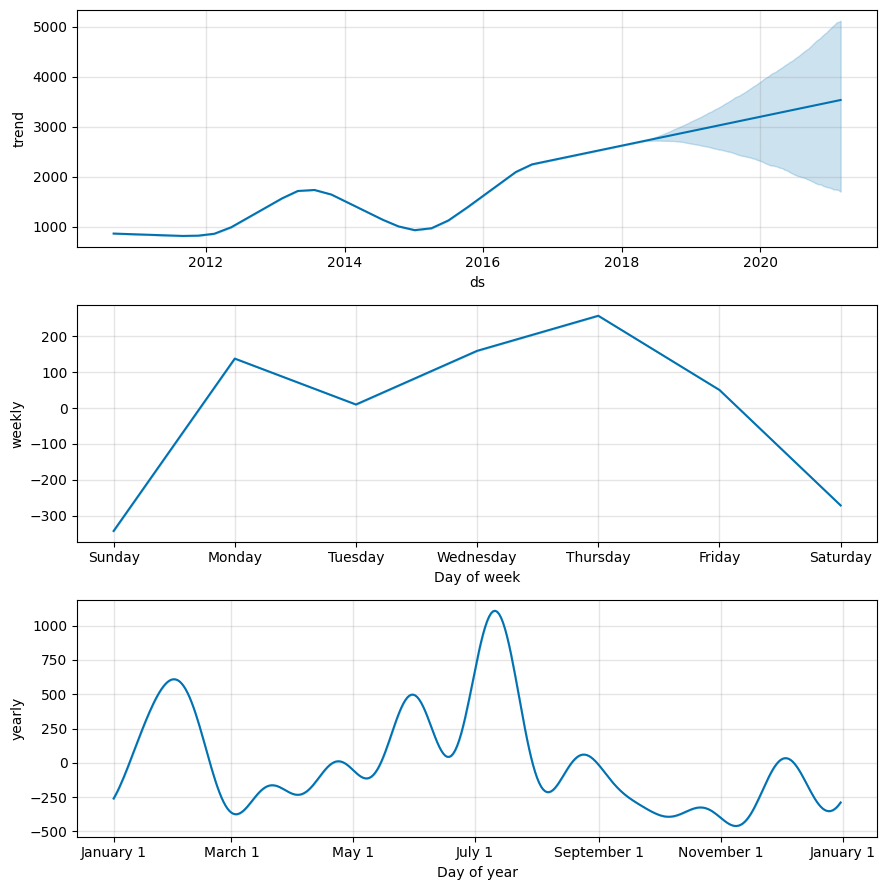

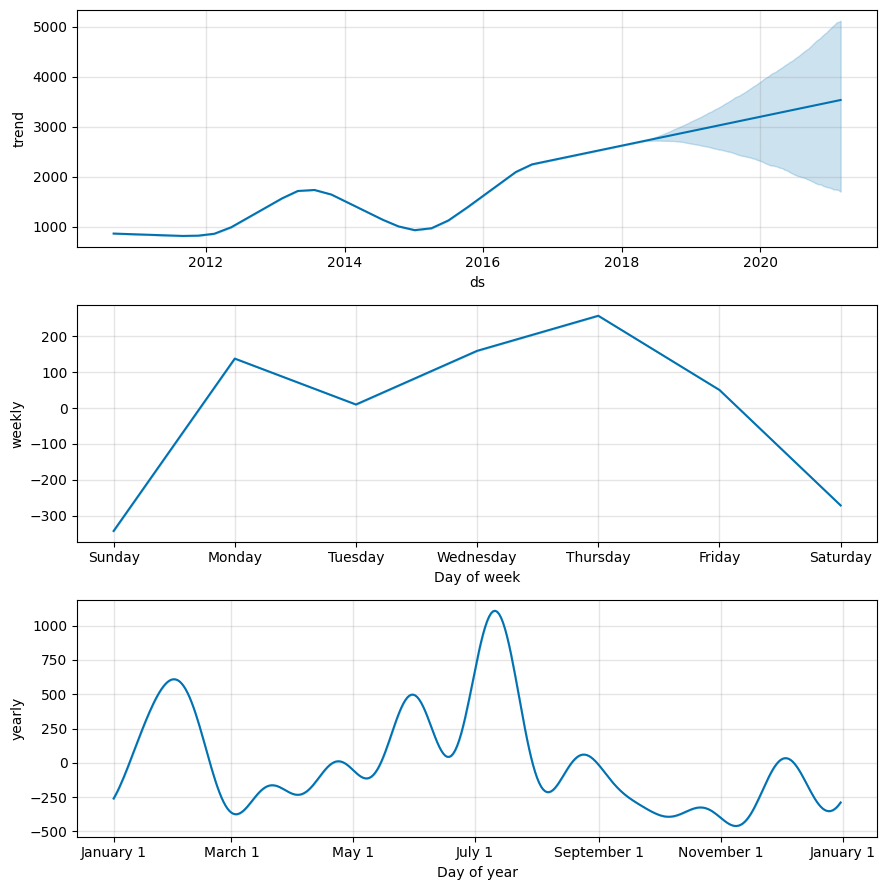

In [125]:
modelm1.plot_components(forecastm1)

**Question 20**

In [126]:
#rename columns to "ds" and "y" respectively
Train_dfm = Train_df_r.rename(columns={"FullDate": "ds", "SysLoad": "add1", "GasPrice": "add2", "ElecPrice": "y" })
Train_dfm.drop(columns='Tmax', inplace=True)
Train_dfm.head()

,ds,add1,add2,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [127]:
modelm = Prophet()
modelm.fit(Train_dfm)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuuziux8/tw_5pved.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsuuziux8/f_0ufkh8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17114', 'data', 'file=/tmp/tmpsuuziux8/tw_5pved.json', 'init=/tmp/tmpsuuziux8/f_0ufkh8.json', 'output', 'file=/tmp/tmpsuuziux8/prophet_modelbri53xzh/prophet_model-20230801223728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:37:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:37:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [129]:
futurem = modelm.make_future_dataframe(periods=1077, freq='D')
forecastm = modelm.predict(futurem)
forecastm.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,863.835947,-1418.888029,3534.404176,863.835947,863.835947,146.477283,146.477283,146.477283,159.421504,159.421504,159.421504,-12.944221,-12.944221,-12.944221,0.0,0.0,0.0,1010.313230
1,2010-09-02,863.700334,-1329.604227,3412.124575,863.700334,863.700334,226.679689,226.679689,226.679689,257.239178,257.239178,257.239178,-30.559489,-30.559489,-30.559489,0.0,0.0,0.0,1090.380022


In [131]:
predictionsm = forecastm[:len(Test_df)]
print(len(predictionsm))

1077


In [132]:
mape_valuem = MAPE(Test_df['ElecPrice'], predictionsm['yhat'])
print(f"MAPE: {mape_value:.2f}%")

MAPE: 295.65%
